## Visualizations and Feature Selection

#### Imports

In [60]:
import pandas as pd
import numpy as np
import yaml
import random
import sys
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import feature_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, f_regression, chi2, f_classif, mutual_info_classif
from sklearn.metrics import DistanceMetric
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics

#### Clustering the data

In [3]:
# Model
# model_file = Path(sys.argv[1])
model_file = "../data/models/kmeans.p"

with open(model_file, 'rb') as f:
    model = pickle.load(f)

# Data the model was trained on
data_file = Path(sys.argv[2])
data_file = '../data/prepared/minmax_data.csv'
df = pd.read_csv(data_file, sep=',', index_col=None)

if df.columns[0] == "id":
    df=df.drop("id", axis=1)
if df.columns[0] == "Unnamed: 0":
    df=df.drop("Unnamed: 0", axis=1)

df.head()

In [5]:
labels = model.predict(df)
df["cluster"] = labels
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,cluster
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527,4
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541,4
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723,4
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333,4
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263,4


#### Correlation Matrix as a Heatmap

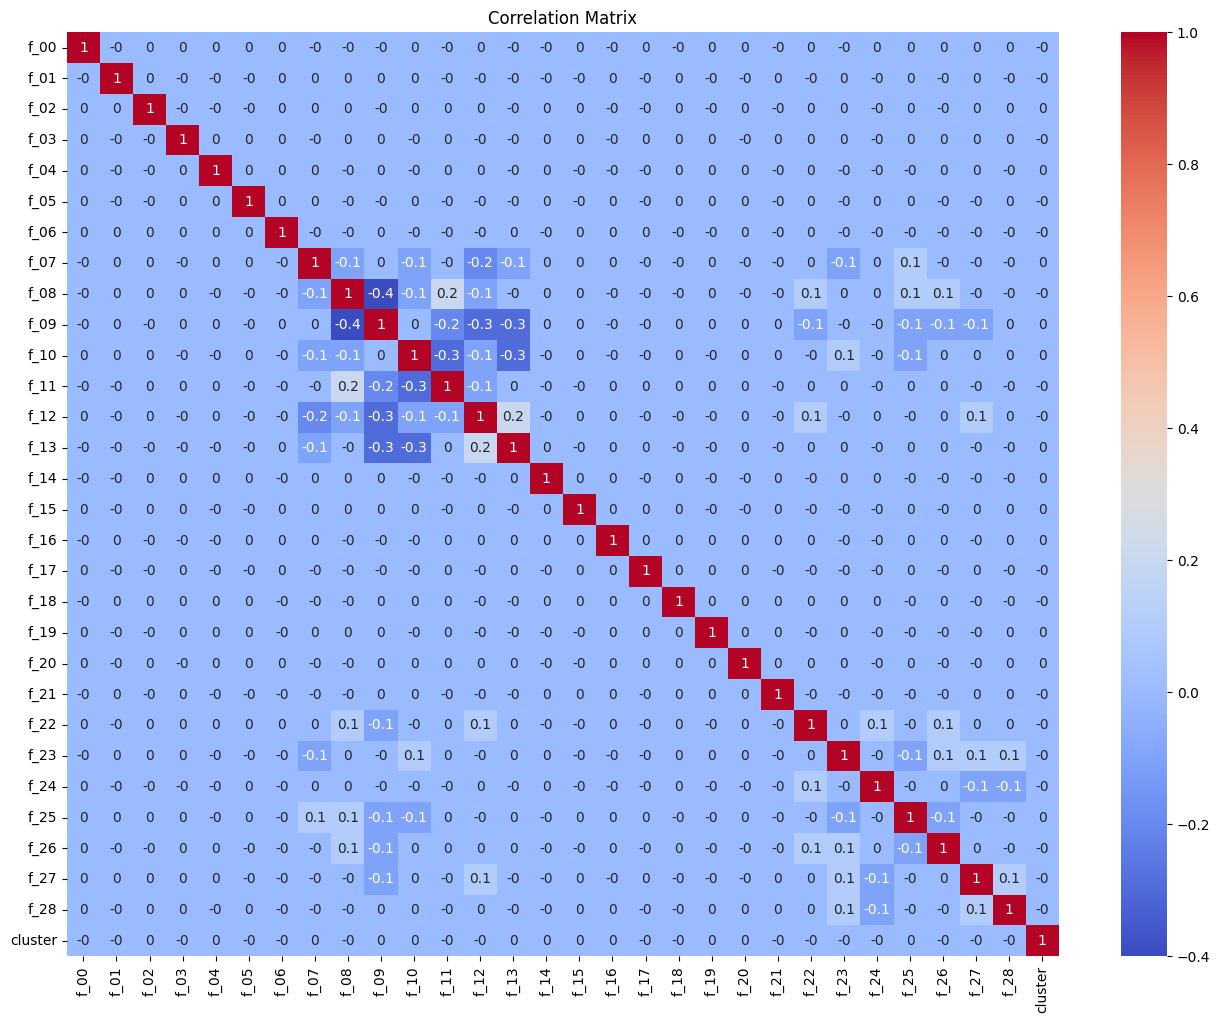

In [6]:
correlation_matrix = df.corr().round(1)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Checking Variance for Each Attribute

In [7]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
variance=df_scaled.drop("cluster",axis=1).std()**2
variance=pd.DataFrame(variance)
variance=variance.sort_values(by=0)
variance

,0
f_27,0.008059
f_26,0.009860
f_24,0.010145
f_23,0.010944
f_19,0.011285
f_00,0.011822
f_28,0.012037
f_20,0.012064
f_22,0.012178
f_05,0.012328


Function to delete the values with lowest variance

In [8]:
def delete_lowest_variance(df,variance,n=5):
    lowest_var=variance[:n]
    for val in lowest_var.index:
        df.drop(columns=[val],inplace=True)
    return df

In [9]:
#df=delete_lowest_variance(df,variance)
#df

Function to delete attributes with too low variance based on threshold

In [10]:
def delete_lowest_variance_threshold(df_normalized, set_threshold=0.01):
    selector=VarianceThreshold(threshold=set_threshold)
    new_df=selector.fit_transform(df_normalized)
    new_df=pd.DataFrame(new_df,columns=selector.get_feature_names_out())
    return new_df

In [11]:
#delete_lowest_variance_threshold(df_scaled)

#### Selecting Best Features

In [12]:
scaler=MinMaxScaler()
df_no_cluster=df.drop(columns=["cluster"])
df_scaled=pd.DataFrame(scaler.fit_transform(df_no_cluster),columns=df_no_cluster.columns)
df_scaled["cluster"]=df["cluster"]

In [13]:
df_scaled.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,cluster
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570,4
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763,4
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558,4
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282,4
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527,4


<AxesSubplot: title={'center': 'Mutual Information'}>

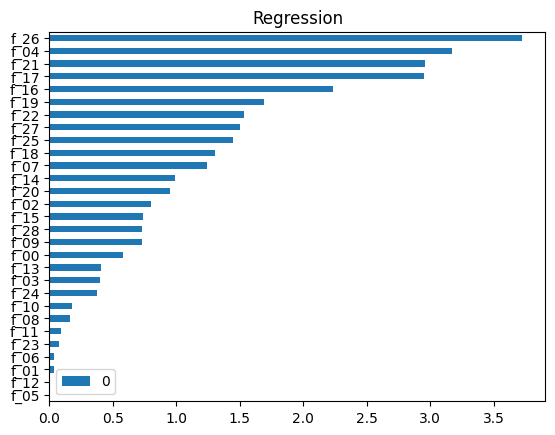

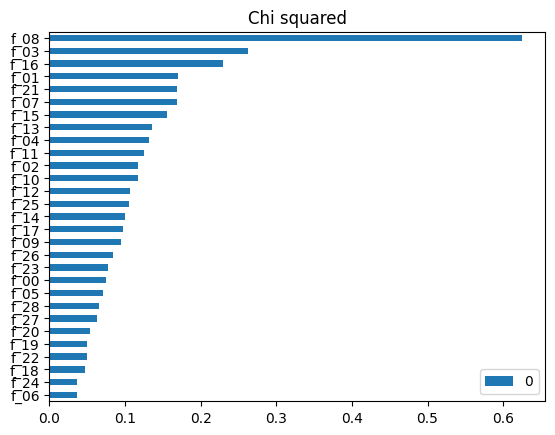

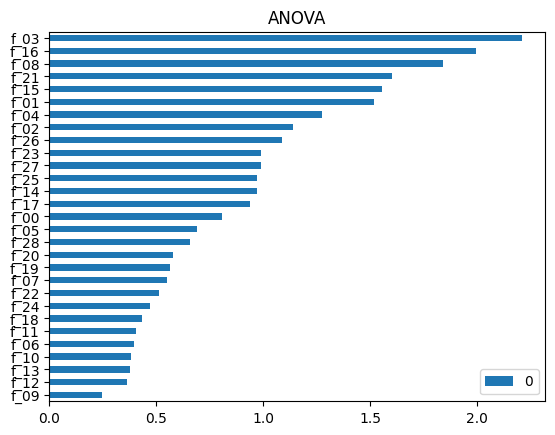

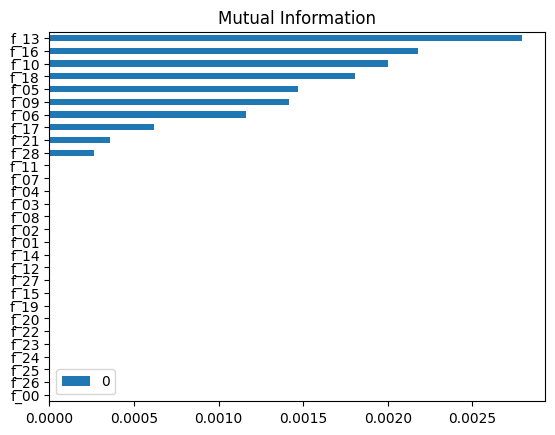

In [14]:
scores_regression, p_vals_reg = f_regression(df_scaled.drop(columns=["cluster"]), df_scaled["cluster"])
scores_chi2, p_vals_chi2 = chi2(df_scaled.drop(columns=["cluster"]), df_scaled["cluster"])
scores_anova, p_vals_anova = f_classif(df_scaled.drop(columns=["cluster"]), df_scaled["cluster"])
scores_mi = mutual_info_classif(df_scaled.drop(columns=["cluster"]), df_scaled["cluster"])

sorted_scores_regression = pd.DataFrame(scores_regression, df_scaled.drop(columns=["cluster"]).columns).sort_values(by=0, ascending=True)
sorted_scores_chi2 = pd.DataFrame(scores_chi2, df_scaled.drop(columns=["cluster"]).columns).sort_values(by=0, ascending=True)
sorted_scores_anova = pd.DataFrame(scores_anova, df_scaled.drop(columns=["cluster"]).columns).sort_values(by=0, ascending=True)
sorted_scores_mi = pd.DataFrame(scores_mi, df_scaled.drop(columns=["cluster"]).columns).sort_values(by=0, ascending=True)

sorted_scores_regression.plot(kind='barh', title='Regression')
sorted_scores_chi2.plot(kind='barh', title='Chi squared')
sorted_scores_anova.plot(kind='barh', title='ANOVA')
sorted_scores_mi.plot(kind='barh', title='Mutual Information')


#### Creating Scatterplots Based on Most Significant Features

C:\Users\mateu\AppData\Local\Temp\ipykernel_2628\24255585.py:7: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(data=df_scaled, x=top_features_regression[0], y=top_features_regression[1], hue='cluster',  palette=['blue', 'red', 'green', 'yellow', 'orange', 'brown', 'black', 'purple', 'pink'], ax=axes[0, 0])
C:\Users\mateu\AppData\Local\Temp\ipykernel_2628\24255585.py:8: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(data=df_scaled, x=top_features_chi2[0], y=top_features_chi2[1], hue='cluster',  palette=['blue', 'red', 'green', 'yellow', 'orange', 'brown', 'black', 'purple', 'pink'], ax=axes[0, 1])
C:\Users\mateu\AppData\Local\Temp\ipykernel_2628\24255585.py:9: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(data=df_scaled, x=top_features_anova[0], y=top_features_anova[1], hue='cluster',  palette=

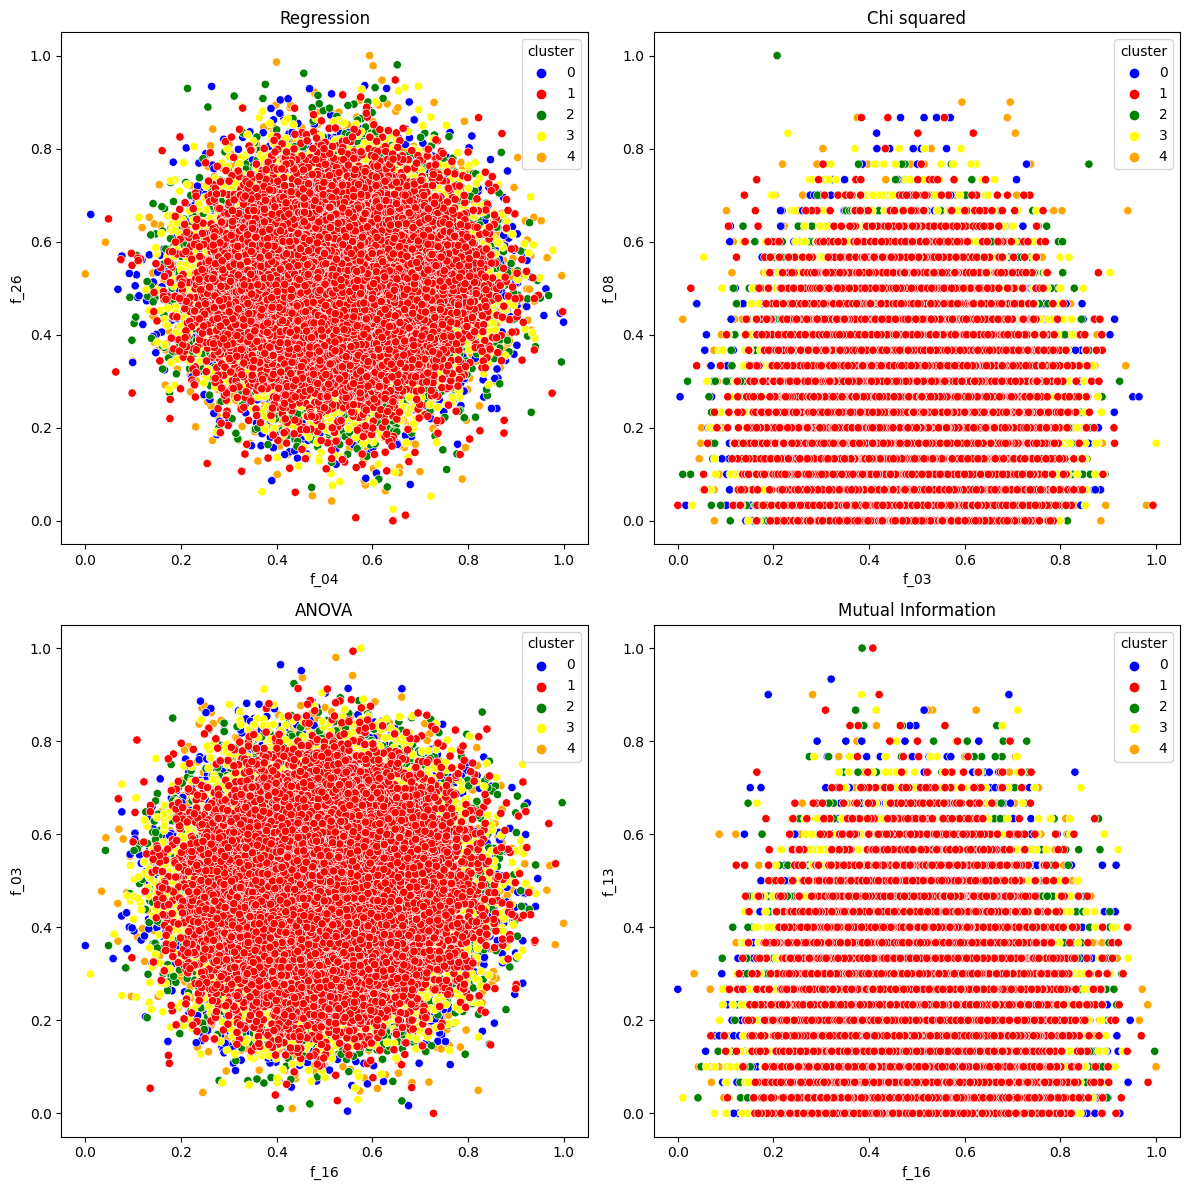

In [15]:
top_features_regression = sorted_scores_regression.tail(2).index.tolist()
top_features_chi2 = sorted_scores_chi2.tail(2).index.tolist()
top_features_anova = sorted_scores_anova.tail(2).index.tolist()
top_features_mi = sorted_scores_mi.tail(2).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.scatterplot(data=df_scaled, x=top_features_regression[0], y=top_features_regression[1], hue='cluster',  palette=['blue', 'red', 'green', 'yellow', 'orange', 'brown', 'black', 'purple', 'pink'], ax=axes[0, 0])
sns.scatterplot(data=df_scaled, x=top_features_chi2[0], y=top_features_chi2[1], hue='cluster',  palette=['blue', 'red', 'green', 'yellow', 'orange', 'brown', 'black', 'purple', 'pink'], ax=axes[0, 1])
sns.scatterplot(data=df_scaled, x=top_features_anova[0], y=top_features_anova[1], hue='cluster',  palette=['blue', 'red', 'green', 'yellow', 'orange', 'brown', 'black', 'purple', 'pink'], ax=axes[1, 0])
sns.scatterplot(data=df_scaled, x=top_features_mi[0], y=top_features_mi[1], hue='cluster',  palette=['blue', 'red', 'green', 'yellow', 'orange', 'brown', 'black', 'purple', 'pink'], ax=axes[1, 1])

axes[0, 0].set_title('Regression')
axes[0, 1].set_title('Chi squared')
axes[1, 0].set_title('ANOVA')
axes[1, 1].set_title('Mutual Information')

plt.tight_layout()
plt.show()

#### Calculating and Visualizing Similarities between Clusters

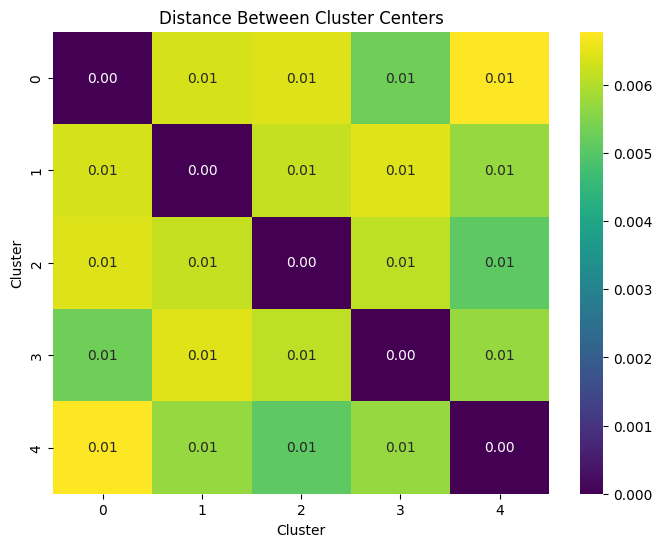

In [16]:
cluster_centers = df_scaled.groupby('cluster').mean()

distance_matrix = euclidean_distances(cluster_centers)

plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('Distance Between Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.show()

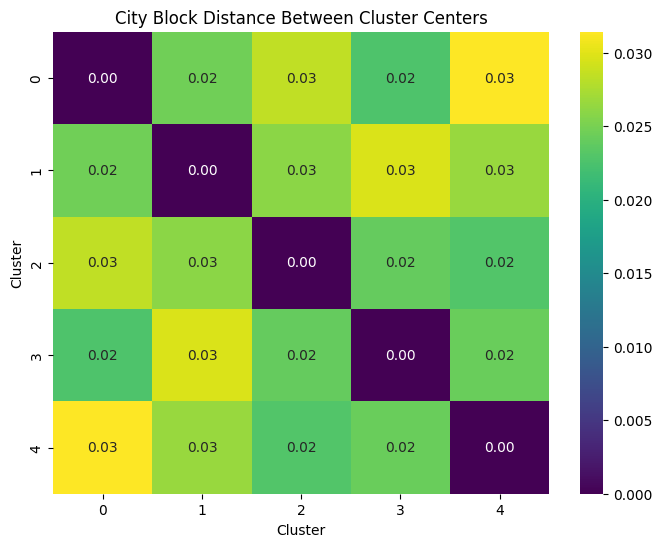

In [17]:
cluster_centers = df_scaled.groupby('cluster').mean()
distance_matrix = manhattan_distances(cluster_centers)

plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('City Block Distance Between Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.show()


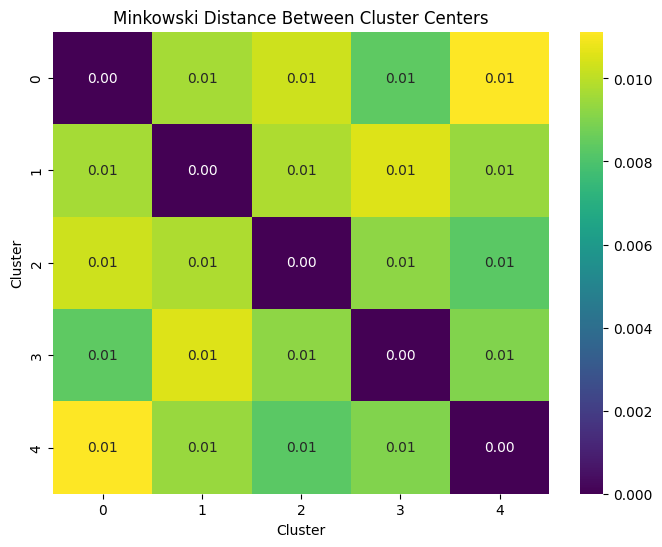

In [59]:
dist = DistanceMetric.get_metric('minkowski',p=1.5)
cluster_centers = df_scaled.groupby('cluster').mean()
distance_matrix = dist.pairwise(cluster_centers)

plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('Minkowski Distance Between Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.show()

#### General Clustering Quality Metrics

The Calinski-Harabasz Index computes the ratio between the within-cluster dispersion and between-cluster dispersion. Higher values indicate better-defined clusters.

The Davies-Bouldin Index evaluates the average similarity between clusters, with lower values indicating better clustering quality.

In [65]:
labels = df_scaled['cluster']

calinski_harabasz_score = metrics.calinski_harabasz_score(df_scaled.drop(columns=["cluster"]), labels)
print("Calinski-Harabasz Index:", calinski_harabasz_score)

davies_bouldin_score = metrics.davies_bouldin_score(df_scaled.drop(columns=["cluster"]), labels)
print("Davies-Bouldin Index:", davies_bouldin_score)

Calinski-Harabasz Index: 0.908659426253359
Davies-Bouldin Index: 234.47787633628968
